In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob

In [2]:
names = np.array([
    "S001_999_096_999",
    "S002_082_081_066",
    "S003_113_112_097",
    "S004_128_141_127",
    "S005_053_052_040",
    "S006_114_113_098",
    "S007_999_067_999",
    "S008_142_999_999",
    "S009_157_156_999",
    "S010_999_041_029",
    "S011_054_999_999",
    "S012_084_083_068",
    "S013_999_143_129",
    "S014_170_180_169",
    "S015_020_030_019",
    "S016_999_999_099",
    "S017_010_009_001",
    "S018_031_999_999",
    "S019_070_999_999",
    "S020_999_999_069",
    "S021_116_115_100",
    "S022_045_144_130",
    "S023_191_190_181",
    "S024_043_055_042",
    "S025_159_171_158",
    "S026_086_999_085",
    "S027_003_011_002",
    "S028_022_032_021",
    "S029_072_071_056",
    "S030_102_117_101",
    "S031_132_146_131",
    "S032_999_999_172",
    "S033_183_192_182",
    "S034_004_012_999",
    "S035_045_999_044",
    "S036_073_087_999",
    "S037_161_173_160",
    "S038_184_193_999",
    "S039_034_033_023",
    "S040_119_118_999",
    "S041_148_147_133",
    "S042_014_999_999",
    "S043_024_999_013",
    "S044_104_103_088",
    "S045_059_058_046",
    "S046_163_999_999",
    "S047_999_999_174",
    "S048_195_194_185",
    "S049_006_015_005",
    "S050_075_074_999",
    "S051_999_134_120",
    "S052_999_163_149",
    "S053_036_047_035",
    "S054_999_105_089",
    "S055_176_175_164",
    "S056_026_025_999",
    "S057_136_135_121",
    "S058_187_196_186",
    "S059_017_016_007",
    "S060_061_076_060",
    "S061_091_090_076",
    "S062_151_165_150",
    "S063_049_048_037",
    "S064_062_999_999",
    "S065_107_122_106",
    "S066_018_999_008",
    "S067_178_177_166",
    "S068_198_197_188",
    "S069_028_038_027",
    "S070_999_063_999",
    "S071_078_092_077",
    "S072_138_137_123",
    "S073_189_999_999",
    "S074_153_999_152",
    "S075_179_999_167",
    "S076_051_050_039",
    "S077_999_093_999",
    "S078_109_124_108",
    "S079_154_999_999",
    "S080_168_999_999",
    "S081_065_079_064",
    "S082_080_999_999",
    "S083_140_155_139",
    "S084_999_999_094",
    "S085_126_999_125",
    "S086_111_110_095",
    "S087_999_999_999",
    "S088_999_999_999",
    "S089_999_999_999",
    "S090_999_999_999",
    "S091_999_999_999",
    "S092_999_999_999",
])

real_x = np.array(
    [  4.237,  -6.228,  14.687,  32.145, -27.159,  14.687, -16.693,
    39.123,  46.097, -41.111, -20.181,  -6.228,  35.632,  63.551,
    -51.576,  11.214, -69.02 , -48.088, -13.202,  -6.214,  14.702,
    35.637,  77.492, -30.646,  53.074,   0.749, -72.517, -51.576,
    -16.662,  11.217,  32.145,  67.037,  74.004, -72.506, -30.646,
    -9.716,  53.075,  74.016, -48.091,  14.687,  35.611, -65.528,
    -58.553,   4.236, -27.157,  49.588,  63.54 ,  77.487, -72.507,
    -16.713,  25.146,  46.086, -41.111,   0.749,  56.562, -58.563,
    25.166,  74.005, -69.02 , -20.181,  -6.223,  42.621, -37.624,
    -23.664,  11.214, -69.02 ,  56.586,  77.487, -51.577, -30.632,
    -9.716,  25.166,  67.037,  42.621,  56.562, -37.614,  -9.716,
    11.213,  39.123,  46.097, -20.181, -16.714,  32.145,   0.75 ,
    21.692,   4.236, -15.037, -76.175, -56.896,  27.051,  84.658,
    61.9  ], dtype=np.float64)

real_y = np.array(
   [  9.189,  15.234,  15.229,  21.275,  27.317,  27.329,  33.359,
    33.854,  33.359,  39.401,  39.401,  39.399,  39.399,  39.37 ,
    45.443,  45.443,  51.485,  51.484,  51.98 ,  51.479,  51.485,
    51.479,  51.484,  57.527,  57.527,  63.569,  69.672,  69.611,
    69.571,  69.609,  69.611,  69.629,  69.61 ,  81.695,  81.695,
    81.695,  81.695,  81.686,  87.739,  87.729,  87.757,  94.274,
    93.779,  93.779,  99.819, 100.316,  99.821,  99.829, 105.863,
    105.867, 105.842, 105.879, 111.905, 111.905, 111.904, 117.929,
    117.947, 117.947, 123.989, 123.989, 124.003, 123.977, 130.031,
    130.526, 130.031, 136.073, 136.079, 136.079, 142.115, 142.088,
    142.115, 142.115, 142.129, 148.133, 148.157, 154.179, 154.199,
    154.199, 154.694, 154.199, 160.241, 166.279, 166.283, 172.325,
    172.314, 178.379,  12.065,  73.66 , 151.333, 173.507, 117.958,
    34.188], dtype=np.float64)

In [3]:
def focus_board(image, DPI, /, threshold=50, chips=[100, 100], filename='../outs/Cropped.jpg'):
    if not filename.endswith('.png') and not filename.endswith('.jpg') and not filename.endswith('.jpeg'):
        return
    
    factor = int(DPI // 600)
    resized_img = resized_img = cv2.resize(image, (int(image.shape[1] // factor), int(image.shape[0] // factor)), interpolation=cv2.INTER_AREA)
    result_img = image.copy()
    
    zeroes = np.zeros((resized_img.shape[0], resized_img.shape[1], 3), dtype=np.uint8)
    ones = np.zeros((resized_img.shape[0], resized_img.shape[1], 3), dtype=np.uint8) + 255

    p_zeroes = np.zeros((resized_img.shape[0], resized_img.shape[1]), dtype=np.uint8)
    p_ones = np.zeros((resized_img.shape[0], resized_img.shape[1]), dtype=np.uint8) + 255

    mask = np.where(resized_img[:, :, :] < 80, ones, zeroes)
    mask = cv2.bilateralFilter(mask, d=9, sigmaColor=80, sigmaSpace=125)
    mask = np.where((mask[:, :, 0] == 255) & (mask[:, :, 1] <= 5) & (mask[:, :, 2] == 255), p_ones, p_zeroes)

    rows = np.where(np.count_nonzero(mask, 1) >= threshold)[0]
    cols = np.where(np.count_nonzero(mask, 0) >= threshold)[0]

    result_img = result_img[rows[0] * factor + chips[0] : rows[-1] * factor - chips[0], 
                            cols[0] * factor + chips[0] : cols[-1] * factor - chips[0]]

    cv2.imwrite(filename, result_img)

    return result_img

In [4]:
def rotate_image(image, DPI):
    factor = int(DPI // 600)
    resized_img = cv2.resize(image, (int(image.shape[1] // factor), int(image.shape[0] // factor)), interpolation=cv2.INTER_AREA)

    # We know image is 600DPI after resizing, thus getting the window in a static way
    window = cv2.cvtColor(resized_img[resized_img.shape[0] - 700 : resized_img.shape[0] - 300, :], cv2.COLOR_BGR2GRAY)

    circles = cv2.HoughCircles(window, cv2.HOUGH_GRADIENT, 0.8, minDist=100, param1=10, param2=34, minRadius=22, maxRadius=29)

    holes = np.int64(circles)
    holes = np.flip(holes[0, np.argsort(holes[:, :, 1])[0]], axis=0)

    for hole in holes:
        cv2.circle(window, (hole[0], hole[1]), 22, (255, 255, 255), -1)
    plt.imshow(window)

    if (holes[0][0] < holes[1][0]):
        y2_minus_y1 = holes[0][1] - holes[1][1]
        x2_minus_x1 = holes[0][0] - holes[1][0]
    else:
        y2_minus_y1 = holes[1][1] - holes[0][1]
        x2_minus_x1 = holes[1][0] - holes[0][0]

    if (x2_minus_x1 == 0): return image

    angle = np.round(np.degrees(np.arctan(np.abs(y2_minus_y1 / x2_minus_x1))), 2)
    print(angle)

    # Rotating the image in opposite direction
    rotated_img = image.copy()
    rotation_matrix = cv2.getRotationMatrix2D((0, 0), -angle, 1)
    rotated_img = cv2.warpAffine(rotated_img, rotation_matrix, (rotated_img.shape[1], rotated_img.shape[0]))

    return rotated_img

In [16]:
def get_holes(image, DPI):
    factor = int(DPI // 600)
    resized_img = cv2.resize(image, (int(image.shape[1] // factor), int(image.shape[0] // factor)), interpolation=cv2.INTER_AREA)

    # getting the window for rotation-angle measurement
    window = cv2.cvtColor(resized_img[resized_img.shape[0] - 700 : resized_img.shape[0] - 450, :], cv2.COLOR_BGR2GRAY)

    circles = cv2.HoughCircles(window, cv2.HOUGH_GRADIENT, 0.8, minDist=100, param1=11, param2=34, minRadius=22, maxRadius=29)

    holes = np.int64(circles)
    holes = np.flip(holes[0, np.argsort(holes[:, :, 1])[0]], axis=0)
    for hole in holes:
        cv2.circle(window, (hole[0], hole[1]), 22, (255, 255, 255), -1)
    plt.imshow(window)

    ref_point = [holes[0][0] * factor, (holes[0][1] + resized_img.shape[0] - 700) * factor]

    # shifting the real coords for considering hole1 as reference point or (0, 0)
    shifted_x = real_x - real_x[0]
    shifted_y = real_y - real_y[0]

    # getting pixel-based coords from real coords
    real_coords = np.array((shifted_x, shifted_y)).T
    real_converted = np.int64(real_coords * DPI // 25.4)

    # applying translations
    real_pix_x = real_converted[:, 0] + ref_point[0]
    real_pix_y = np.abs(ref_point[1] - real_converted[:, 1])
    coords_real_pix = np.array((real_pix_x, real_pix_y, names)).T

    return coords_real_pix

In [6]:
def annotate_holes(image, holes, DPI, /, color1=(255, 255, 255), color2=(255, 255, 0), thickness1=3, radius=4, thickness2=-1, fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=1, filename="../outs/All_Names.png"):
    if not filename.endswith('.png') and not filename.endswith('.jpg') and not filename.endswith('.jpeg'):
        return

    result_img = image.copy()
    
    for hole in holes:
        cv2.putText(result_img, str(hole[2].split('_')[0]), (int(hole[0]), int(hole[1])), fontFace, fontScale * (DPI // 600), color1, thickness1 * (DPI // 600))
        cv2.circle(result_img, (int(hole[0]), int(hole[1])), radius * (DPI // 600), color2, thickness2 * (DPI // 600))

    cv2.imwrite(filename, result_img)
    return result_img

In [79]:
def extract(image, holes, image_DPI, /, font_size=0.8, path="../outs/Conventionally_named_holes/", offset=(100, 100)):
    if type(offset) != type(()):
        print("Offset must be specified as a tuple")
        return
    
    factor = image_DPI // 600
    x_offset, y_offset = np.array(offset) * factor

    try:
        num = 0
        strip = None
        for hole in holes:
            # print(int(hole[1]) - x_offset, int(hole[1]) + x_offset, int(hole[0]) - y_offset, int(hole[0]) + y_offset)
            cropped_hole = image[int(hole[1]) - x_offset : int(hole[1]) + x_offset, int(hole[0]) - y_offset : int(hole[0]) + y_offset]
            if strip is None:
                strip = np.ones((25 * factor, cropped_hole.shape[1], 3)) * 255
            final_img = np.vstack((cropped_hole, strip.astype('uint8')))
            cv2.putText(final_img, f"{hole[2]}.jpg", (5 * factor, final_img.shape[0] - 10 * factor), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=, color=(0, 0, 0), thickness=1)
            rgb_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            pil_img = Image.fromarray(rgb_img)
            pil_img.save(f"{path + hole[2]}.jpg", dpi=(image_DPI, image_DPI))
            num += 1
    except:
        return False
    return True

0.61


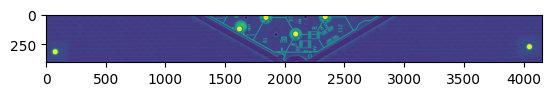

In [74]:
# Suppressing scientific notations for printing floating point values
np.set_printoptions(suppress=True)

# Reading the image
FILENAME = '../resources/600 DPI -PCB007.jpg'
Image.MAX_IMAGE_PIXELS = None
img = Image.open(fp=FILENAME, mode="r")
DPI = img.info['dpi'][0]
img = np.array(img)

# converting rgb to bgr
img = np.flip(img, axis=-1)

cropped_img = focus_board(img, DPI)

rotated_img = rotate_image(cropped_img, DPI)

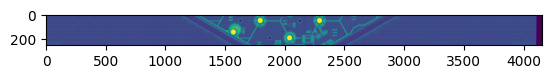

In [75]:
holes = get_holes(rotated_img, DPI)

_ = annotate_holes(rotated_img, holes, DPI)

In [78]:
extract(rotated_img, holes, DPI)

True

In [19]:
def get_vid(dir, filename="../outs/video.avi"):
    paths = glob.glob(dir)

    if paths is None: return

    images = []
    for im_path in paths:
        img = cv2.imread(im_path)
        images.append(img)

    fourcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(filename, fourcc, 0.5, (images[0].shape[1], images[0].shape[0]), True)

    for img in images:
        out.write(img)
    out.release()

In [20]:
get_vid("e:\\TIFR Project\\combine\\outs\\Conventionally_named_holes\\*.jpg")

In [13]:
# %timeit extract(rotated_img, holes, DPI)

In [14]:
def timers_function(img, DPI):
    cropped_img = focus_board(img, DPI)
    rotated_img = rotate_image(cropped_img, DPI)

    holes = get_holes(rotated_img, DPI)
    _ = annotate_holes(rotated_img, holes, DPI)

    extract(cropped_img, holes, DPI)
    get_vid("e:\\TIFR Project\\combine\\outs\\Conventionally_named_holes\\*.jpg")

In [15]:
# # Reading the image
# Image.MAX_IMAGE_PIXELS = None
# for FILENAME in ['../resources/600 DPI -PCB007.jpg', '../resources/1200 DPI -PCB008.jpg', '../resources/800 RS -PCB006.jpg']:
#     img = Image.open(fp=FILENAME, mode="r")
#     DPI = img.info['dpi'][0]
#     img = np.array(img)
#     img = np.flip(img, axis=-1)

#     %timeit -c timers_function(img, DPI)